### Load Data and Split

To Do List:

1. How well does the model generalize to other hero 20 runs?

2. Perform same transformations on the larger code set
3. Look into implementing the window functionality

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data

from sklearn.preprocessing import MinMaxScaler



Found 4 tensors with length 0 at indices: [2460, 2501, 2512, 2583]


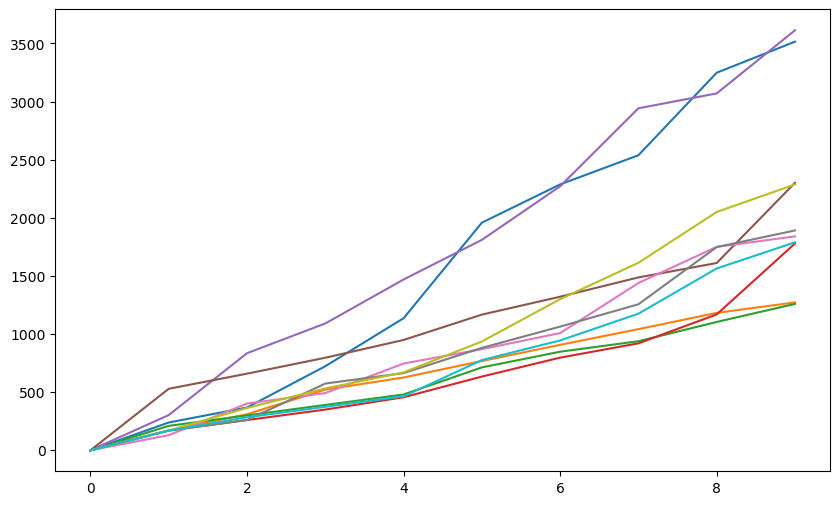

In [34]:
%run data_prep_one_hero.ipynb

In [5]:
heroes.loc[heroes['id'] == 20, 'name']

19    npc_dota_hero_vengefulspirit
Name: name, dtype: object

Below we are selecting only one timeseries for the Hero_ID = 20, Vengeful Spirit. Later we will try to see how well the model performs on the other games of Vengeful Spirit.

We would like to test the model on new time-series.

In [57]:
def one_series_prep(df, index):

    one_series = pd.DataFrame(df.iloc[index]) # select chosen index
    one_series = one_series.reset_index(drop = False) # Create another index to serve as the minute column
    one_series = one_series.rename(columns={'index':'minute',0:'gold_t'}) # Re-name the column to be the minute column

    one_series = one_series[['gold_t']].values.astype('float32') # Convert gold_t values

    # Scaling the TimeSeries
    # if scale == True:
    #   scaler = MinMaxScaler()
    #   dataset_scaled = scaler.fit_transform(one_series) # Scaling the dataset
    # else: 
    #   dataset_scaled = one_series

    return one_series #, dataset_scaled



def train_split(series): 
    """ Split a series into training material and testing material
     
      Args:
        series: a time series from Pandas, pd.Series
    """
    train_size_dota = int(len(series) * 0.67) 
    test_size_dota = len(series) - train_size_dota
    train_dota, test_dota = series[:train_size_dota], series[train_size_dota:]

    return train_dota, test_dota 


Testing Function Logics:

In [8]:
# # We are performing the same operations to the scaled and unscaled data so that we can compare values between the two if it behooves us
# one_series = pd.DataFrame(df_20[index]) # select chosen index
# one_series = one_series.reset_index(drop = False) # Create another index to serve as the minute column
# one_series = one_series.rename(columns={'index':'minute',0:'gold_t'}) # Re-name the column to be the minute column

# dota_timeseries = one_series[['gold_t']].values.astype('float32') # Convert gold_t values

# # Scaling the TimeSeries
# scaler = MinMaxScaler()
# dataset_scaled = scaler.fit_transform(dota_timeseries) # Scaling the dataset



# # Unscaled data
# train_size_dota = int(len(dota_timeseries) * 0.67)
# test_size_dota = len(dota_timeseries) - train_size_dota
# train_dota, test_dota = dota_timeseries[:train_size_dota], dota_timeseries[train_size_dota:]

# # Scaled data
# train_size_scaled= int(len(dataset_scaled) * 0.67)
# test_size_scaled = len(dataset_scaled) - train_size_scaled
# train_scaled, test_scaled = dataset_scaled[:train_size_scaled], dataset_scaled[train_size_scaled:]

In [9]:

def create_dataset(dataset, lookback):
    """Transform a time series into a prediction dataset
    
    Args:
        dataset: A numpy array of time series, first dimension is the time steps
        lookback: Size of window for prediction
    """

    # Scaled Return,
    X, y = [], []
    # Non-Scaled Return


    for i in range(len(dataset)-lookback): # The loop range subtracts lookback since a timeseries requires a number of windows to compute over
        # For example if we choose lookback = 4, meaning we look back over 4 time steps and predict on the 5th, if we have 30 timesteps, we can only create
        # the time series from the 5th timestep forward
        # Can think of the rest of these steps referencing a dataset of length 30 - 4 lookback steps = 26

        # No Scaling Window Creation
        feature = dataset[i:i+lookback]
        target = dataset[i+1:i+lookback+1]
        X.append(feature)
        y.append(target)
        
        # Scaled Window Creation


    X = torch.tensor(X)
    y = torch.tensor(y)

    

    return X, y


In [10]:
# Testing iteration loop to see results
# for i in range(len(train_dota) - lookback):
#     print(i)
#     feature_nocs = train_dota[i:i+lookback] # i.e. 1 - 5, then 2 - 6
#     target_nocs = train_dota[i+1:i+lookback+1]
#     print(feature_nocs)
#     print(target_nocs)

In [11]:
# Testing Scaler Results

# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()

# X_scaled = scaler.fit_transform(train_dota)

# X_scaled

Here we are using create_dataset to create our tensors of shape (window size, time steps, features).

Window Size: the full length of the time series
Time Steps: the number of steps the model can "lookback" on
Features: Number of features, ours will only be the time series

Note that we are returning the train and the test time series in the same size. This is because when we run the model on the test, it is going to use the same number of time steps (lookback = 4) to predict the next value, just like how the model trained.


A higher lookback window for dota caused a huge increase in accuracy with single digit RMSE's

### Creating the datasets

In [1]:
# Creating the datasets
lookback = 5

# Scaled
X_train_scaled, y_train_scaled = create_dataset(scaled_df20.iloc[0], lookback=lookback)
X_test_scaled, y_test_scaled = create_dataset(scaled_df20.iloc[1], lookback=lookback)

# Unscaled

#X_train_dota, y_train_dota = create_dataset(train_dota, lookback=lookback)
#X_test_dota, y_test_dota = create_dataset(test_dota, lookback=lookback)



NameError: name 'create_dataset' is not defined

In [13]:
y_test_dota

tensor([[[21137.],
         [21708.],
         [21808.],
         [22016.],
         [22211.]],

        [[21708.],
         [21808.],
         [22016.],
         [22211.],
         [22568.]],

        [[21808.],
         [22016.],
         [22211.],
         [22568.],
         [22829.]],

        [[22016.],
         [22211.],
         [22568.],
         [22829.],
         [23202.]],

        [[22211.],
         [22568.],
         [22829.],
         [23202.],
         [24228.]],

        [[22568.],
         [22829.],
         [23202.],
         [24228.],
         [24760.]],

        [[22829.],
         [23202.],
         [24228.],
         [24760.],
         [24865.]],

        [[23202.],
         [24228.],
         [24760.],
         [24865.],
         [25151.]],

        [[24228.],
         [24760.],
         [24865.],
         [25151.],
         [25436.]],

        [[24760.],
         [24865.],
         [25151.],
         [25436.],
         [25542.]],

        [[24865.],
         [2

In [14]:
print(X_train_scaled.shape, y_train_scaled.shape)
print(X_test_scaled.shape, y_test_scaled.shape)

print(X_train_dota.shape, y_train_dota.shape)
print(X_test_dota.shape, y_test_dota.shape)

torch.Size([35, 5, 1]) torch.Size([35, 5, 1])
torch.Size([15, 5, 1]) torch.Size([15, 5, 1])
torch.Size([35, 5, 1]) torch.Size([35, 5, 1])
torch.Size([15, 5, 1]) torch.Size([15, 5, 1])


In [15]:
# Checking objects

#X_train_dota
#X_train_scaled

The output of nn.LSTM() is a tuple. The first element is the generated hidden states, one for each time step of the input. The second element is the LSTM cell’s memory and hidden states, which is not used here.

The LSTM layer is created with option batch_first=True because the tensors you prepared is in the dimension of (window sample, time steps, features) and where a batch is created by sampling on the first dimension. If batch_first=False, then the shape of the tensor changes. I believe the 2nd or the first changes.

### Creating LSTM Model

In [16]:
class LSTMModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.lstm = nn.LSTM(input_size=1, hidden_size=50, num_layers=1, batch_first=True)
        self.linear = nn.Linear(50, 1)
        
    def forward(self, x):
        x, _ = self.lstm(x)
        x = self.linear(x)
        return x

In [17]:
import numpy as np
import torch.optim as optim
import torch.utils.data as data

model = LSTMModel()
optimizer = optim.Adam(model.parameters() ,lr=0.001)
loss_fn = nn.MSELoss()
dota_loader = data.DataLoader(data.TensorDataset(X_train_scaled, y_train_scaled), shuffle=True, batch_size=8)

### Dota Training Loop

In [18]:
n_epochs = 800
for epoch in range(n_epochs):
    model.train()
    for X_batch, y_batch in dota_loader:
        y_pred = model(X_batch)
        loss = loss_fn(y_pred, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # Validation
    if epoch % 100 != 0:
        continue
    model.eval()
    with torch.no_grad():
        y_pred = model(X_train_scaled)
        train_rmse = np.sqrt(loss_fn(y_pred, y_train_scaled))
        y_pred = model(X_test_scaled)
        test_rmse = np.sqrt(loss_fn(y_pred, y_test_scaled))
    print("Epoch %d: train RMSE %.4f, test RMSE %.4f" % (epoch, train_rmse, test_rmse))

Epoch 0: train RMSE 0.2198, test RMSE 0.7074
Epoch 100: train RMSE 0.0356, test RMSE 0.1379
Epoch 200: train RMSE 0.0107, test RMSE 0.0478
Epoch 300: train RMSE 0.0098, test RMSE 0.0513
Epoch 400: train RMSE 0.0099, test RMSE 0.0496
Epoch 500: train RMSE 0.0096, test RMSE 0.0576
Epoch 600: train RMSE 0.0108, test RMSE 0.0672
Epoch 700: train RMSE 0.0098, test RMSE 0.0637


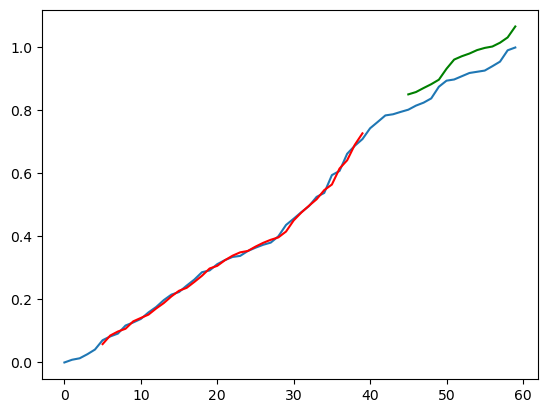

In [19]:
with torch.no_grad():
    # shift train predictions for plotting
    train_plot = np.ones_like(dataset_scaled) * np.nan
    y_pred = model(X_train_scaled)
    y_pred = y_pred[:, -1, :]
    train_plot[lookback:train_size_scaled] = model(X_train_scaled)[:, -1, :] # I believe that the model also outputs data in the tensor shape of (windows, time steps, features)
    # so when we pull model(X_train_scaled)[:, -1, :], we are pulling the last predictions
    
    # shift test predictions for plotting
    test_plot = np.ones_like(dataset_scaled) * np.nan
    test_plot[train_size_scaled+lookback:len(dataset_scaled)] = model(X_test_scaled)[:, -1, :]
# plot
plt.plot(dataset_scaled)
plt.plot(train_plot, c='r')
plt.plot(test_plot, c='g')
plt.show()